In [1]:
import pandas as pd

# prerequisites
import torch
th = torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'serif'
import numpy as np


from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

to_tensor = lambda x: torch.tensor(x).to(torch.float32)

C:\Users\berni\anaconda3\envs\hku_202324S2\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\berni\anaconda3\envs\hku_202324S2\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\berni\anaconda3\envs\hku_202324S2\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

class CustomDataset(Dataset):
    def __init__(self, X, y):
        # Generate random data for X with shape (N, 20)
        self.X = X
        # Generate random data for y with shape (N, 18, 10)
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [158]:
# COLOR MAPS

import matplotlib.pyplot as plt
import matplotlib.colors

# Color for False and True
cmap = matplotlib.colors.ListedColormap(['midnightblue', 'orange'])

In [631]:
# ORIENTATION

df = pd.read_csv(r"\\Mac\Home\Desktop\Orientation ALL.csv")
df = df.drop(df.tail(5).index,inplace=False)
df = df.drop(df.head(1).index,inplace=False)

x = (df['% of Total Area_0'] * 100)
Y = (df['Average Sensor_0'].values)
z = (df['Orientation_0'].values)
u = (df[['Panel_{}'.format(_i) for _i in range(20)]].values)

x_sort = np.argsort(x)

top_x = x_sort[::-1][:30]
bottom_x = x_sort[:30]

# top_u = u[top_x.index]

top_u = u[top_x]
bottom_u = u[bottom_x]

In [637]:
panelfreq = pd.DataFrame(bottom_u) 

min_val = 2.0
max_val = 10.0
panelfreqnorm = (panelfreq.sum() - min_val) / (max_val - min_val)

freq = pd.DataFrame(panelfreqnorm).T

panelfreq.sum().min()

2.0

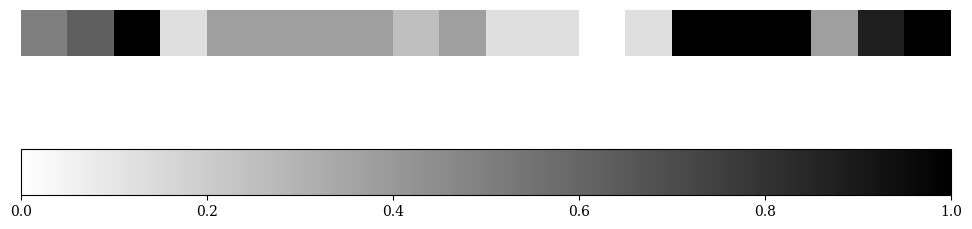

In [638]:
fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(freq, cmap='binary')
plt. axis('off')
im_ratio = freq.shape[0]/freq.shape[1]
plt.colorbar(orientation='horizontal')

In [486]:
indices1 = [np.where(row == 1)[0] for row in u]

arr_tuples = [tuple(row) for row in indices1]

unique_tuples = list(set(arr_tuples))

dataframe=pd.DataFrame(indices1) 

npindices1 = np.array(dataframe)

npindices1[221:234]

array([[ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.],
       [ 0.,  4., 14., 16.]])

In [472]:
dataframe['index'] = (dataframe.index // 13) + 1

sameindex = dataframe['index']

sameindex[65:78]

65    6
66    6
67    6
68    6
69    6
70    6
71    6
72    6
73    6
74    6
75    6
76    6
77    6
Name: index, dtype: int64

In [599]:
# FINAL DATA

df1 = pd.read_csv(r"\\Mac\Home\Desktop\FINALDATA!.csv")

da = (df1['% of Total Area_0'])
sensor = (df1['Average Sensor_0'])
panels = (df1[['Panel_{}'.format(_i) for _i in range(20)]].values)

top_da = da[sorted_da][::-1][:500]
bottom_da = da[sorted_da][:500]
top_sensor = sensor[sorted_sensor][::-1][:500]
bottom_sensor = sensor[sorted_sensor][:500]



# TOP/BOTTOM 500

top_da_panels = panels[top_da.index]
bottom_da_panels = panels[bottom_da.index]
bottom_sensor_panels = panels[bottom_sensor.index]
top_sensor_panels = panels[top_sensor.index]



sorted_da = np.argsort(da)
other_sorted_da = np.argsort(da)[::-1]

sorted_sensor = np.argsort(sensor)

top_panels_da = X[sorted_da]
top_da = da[sorted_da][::-1][:500]
top_sensor = sensor[sorted_sensor][::-1][:500]

bottom_panels_da = X[other_sorted_da]
bottom_panels_sensor = X[sorted_sensor][:25]
bottom_da = da[sorted_da][:500]

top_sensor.shape

(500,)

In [283]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

# FINAL DATA PANELS

indices = [np.where(row == 1)[0] for row in panels]

npindices = np.array(indices)


# ORIENTATION PANELS

# indices1 = [np.where(row == 1)[0] for row in u]

# npindices1 = np.array(indices1)


# TOP/BOTTOM 500 PANELS

indices2 = [np.where(row == 1)[0] for row in top_da_panels]

npindices2 = np.array(indices2)

npindices1

array([[ 2,  5, 10, 14],
       [ 2,  5, 10, 14],
       [ 2,  5, 10, 14],
       ...,
       [ 1,  3,  4, 16],
       [ 1,  3,  4, 16],
       [ 1,  3,  4, 16]], dtype=int64)

In [309]:
# ORIENTATION CONSECUTIVE

consecutive = np.zeros_like(npindices1, dtype=bool)
for i in range(npindices1.shape[0]):
    for j in range(npindices1.shape[1]):
        if i > 0 and abs(npindices1[i, j] - npindices1[i-1, j]) == 1:
            consecutive[i, j] = True
        elif i < npindices1.shape[0] - 1 and abs(npindices1[i, j] - npindices1[i+1, j]) == 1:
            consecutive[i, j] = True

has_true = np.any(consecutive, axis=1)


# FINAL DATA CONSECUTIVE

consecutive1 = np.zeros_like(npindices, dtype=bool)
for i in range(npindices.shape[0]):
    for j in range(npindices.shape[1]):
        if i > 0 and abs(npindices[i, j] - npindices[i-1, j]) == 1:
            consecutive1[i, j] = True
        elif i < npindices.shape[0] - 1 and abs(npindices[i, j] - npindices[i+1, j]) == 1:
            consecutive1[i, j] = True

has_true1 = np.any(consecutive1, axis=1)


# TOP 500 CONSECUTIVE

consecutive2 = np.zeros_like(npindices2, dtype=bool)
for i in range(npindices2.shape[0]):
    for j in range(npindices2.shape[1]):
        if i > 0 and abs(npindices2[i, j] - npindices2[i-1, j]) == 1:
            consecutive2[i, j] = True
        elif i < npindices2.shape[0] - 1 and abs(npindices2[i, j] - npindices2[i+1, j]) == 1:
            consecutive2[i, j] = True

has_true2 = np.any(consecutive2, axis=1)


# da[(top_da *100)].min()

import random

sorted(top_da, key=lambda x: random.random())

[0.688889,
 0.688889,
 0.727778,
 0.694444,
 0.694444,
 0.711111,
 0.688889,
 0.7,
 0.711111,
 0.694444,
 0.733333,
 0.694444,
 0.7,
 0.7,
 0.711111,
 0.744444,
 0.744444,
 0.755556,
 0.688889,
 0.694444,
 0.711111,
 0.7,
 0.7,
 0.7,
 0.755556,
 0.7,
 0.688889,
 0.711111,
 0.744444,
 0.688889,
 0.688889,
 0.694444,
 0.705556,
 0.683333,
 0.716667,
 0.694444,
 0.688889,
 0.705556,
 0.694444,
 0.7,
 0.688889,
 0.716667,
 0.711111,
 0.683333,
 0.705556,
 0.744444,
 0.683333,
 0.733333,
 0.683333,
 0.694444,
 0.716667,
 0.683333,
 0.683333,
 0.711111,
 0.694444,
 0.711111,
 0.688889,
 0.711111,
 0.683333,
 0.711111,
 0.705556,
 0.738889,
 0.711111,
 0.705556,
 0.688889,
 0.727778,
 0.688889,
 0.683333,
 0.688889,
 0.688889,
 0.711111,
 0.694444,
 0.7,
 0.683333,
 0.7,
 0.711111,
 0.7,
 0.688889,
 0.7,
 0.711111,
 0.688889,
 0.733333,
 0.7,
 0.738889,
 0.705556,
 0.694444,
 0.716667,
 0.722222,
 0.75,
 0.705556,
 0.683333,
 0.683333,
 0.7,
 0.716667,
 0.694444,
 0.7,
 0.705556,
 0.711111,
 

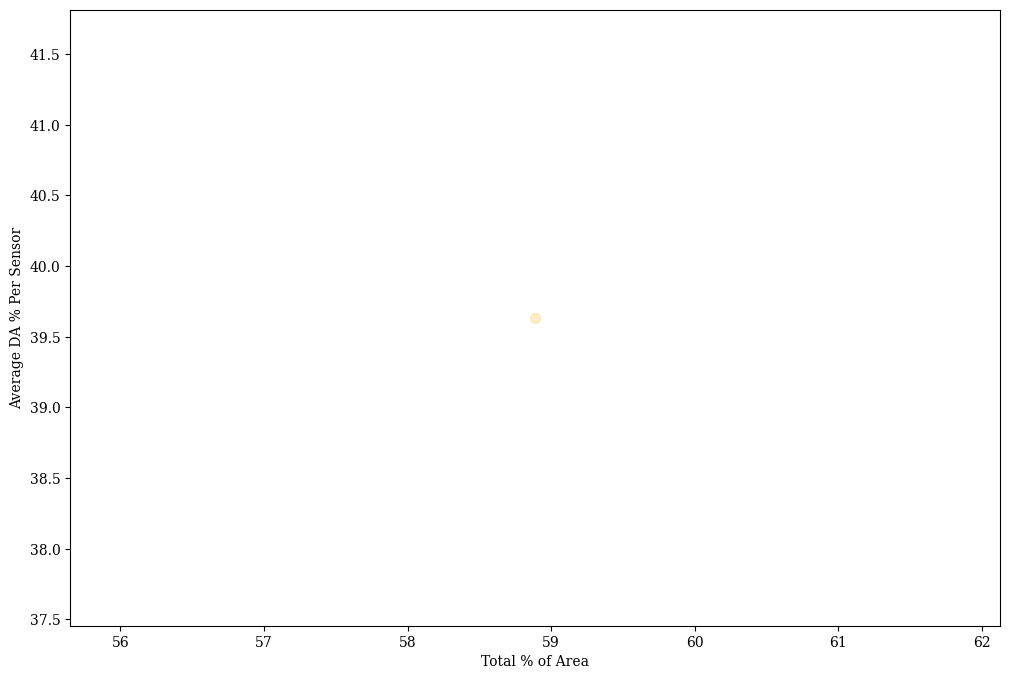

In [288]:
# FINAL DATA

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter((da * 100)[::-1][500], sensor[::-1][500], c=has_true1, cmap=cmap, vmin=0., vmax=0.15, s=50, alpha=0.2, label='Consecutive Panels')
# plt.legend(loc='upper left')
# plt.yticks(np.arange(1, 100))
# plt.xticks(np.arange(1, 1))
ax.set_ylabel('Average DA % Per Sensor')
ax.set_xlabel('Total % of Area')
plt.show()

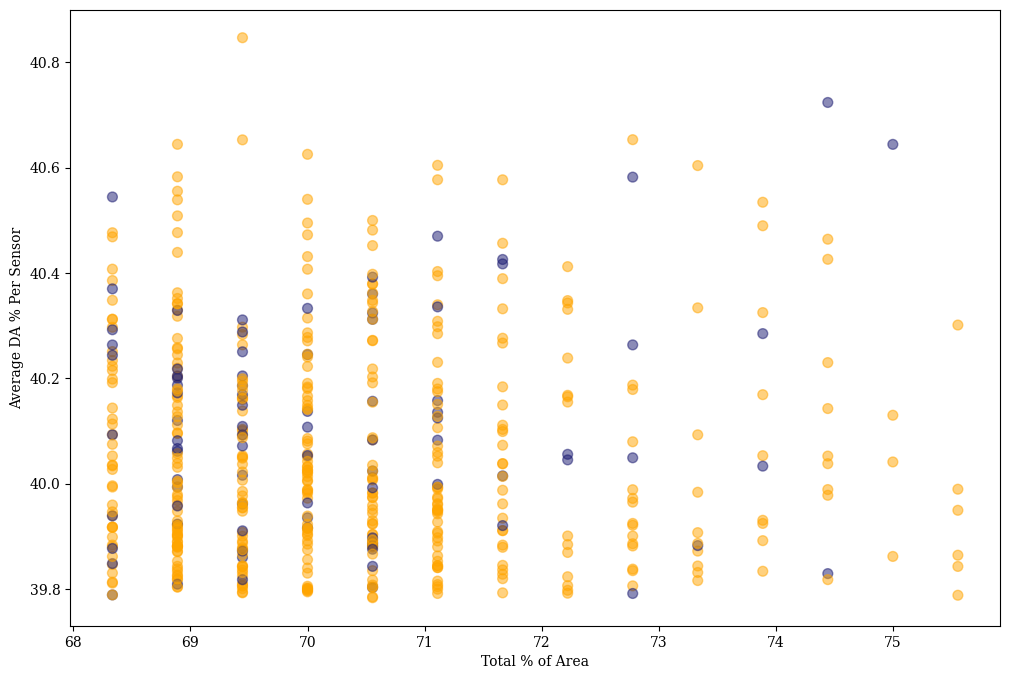

(500,)

In [325]:
# TOP 500

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(sorted(top_da * 100, key=lambda x: random.random()), sorted(top_sensor, key=lambda x: random.random()), c=has_true2, cmap=cmap, vmin=0., vmax=0.15, s=50, alpha=0.5, label='Consecutive Panels')
# plt.legend(loc='upper left')
# plt.yticks(np.arange(1, 100))
# plt.xticks(np.arange(1, 1))
ax.set_ylabel('Average DA % Per Sensor')
ax.set_xlabel('Total % of Area')
plt.show()

has_true2.shape

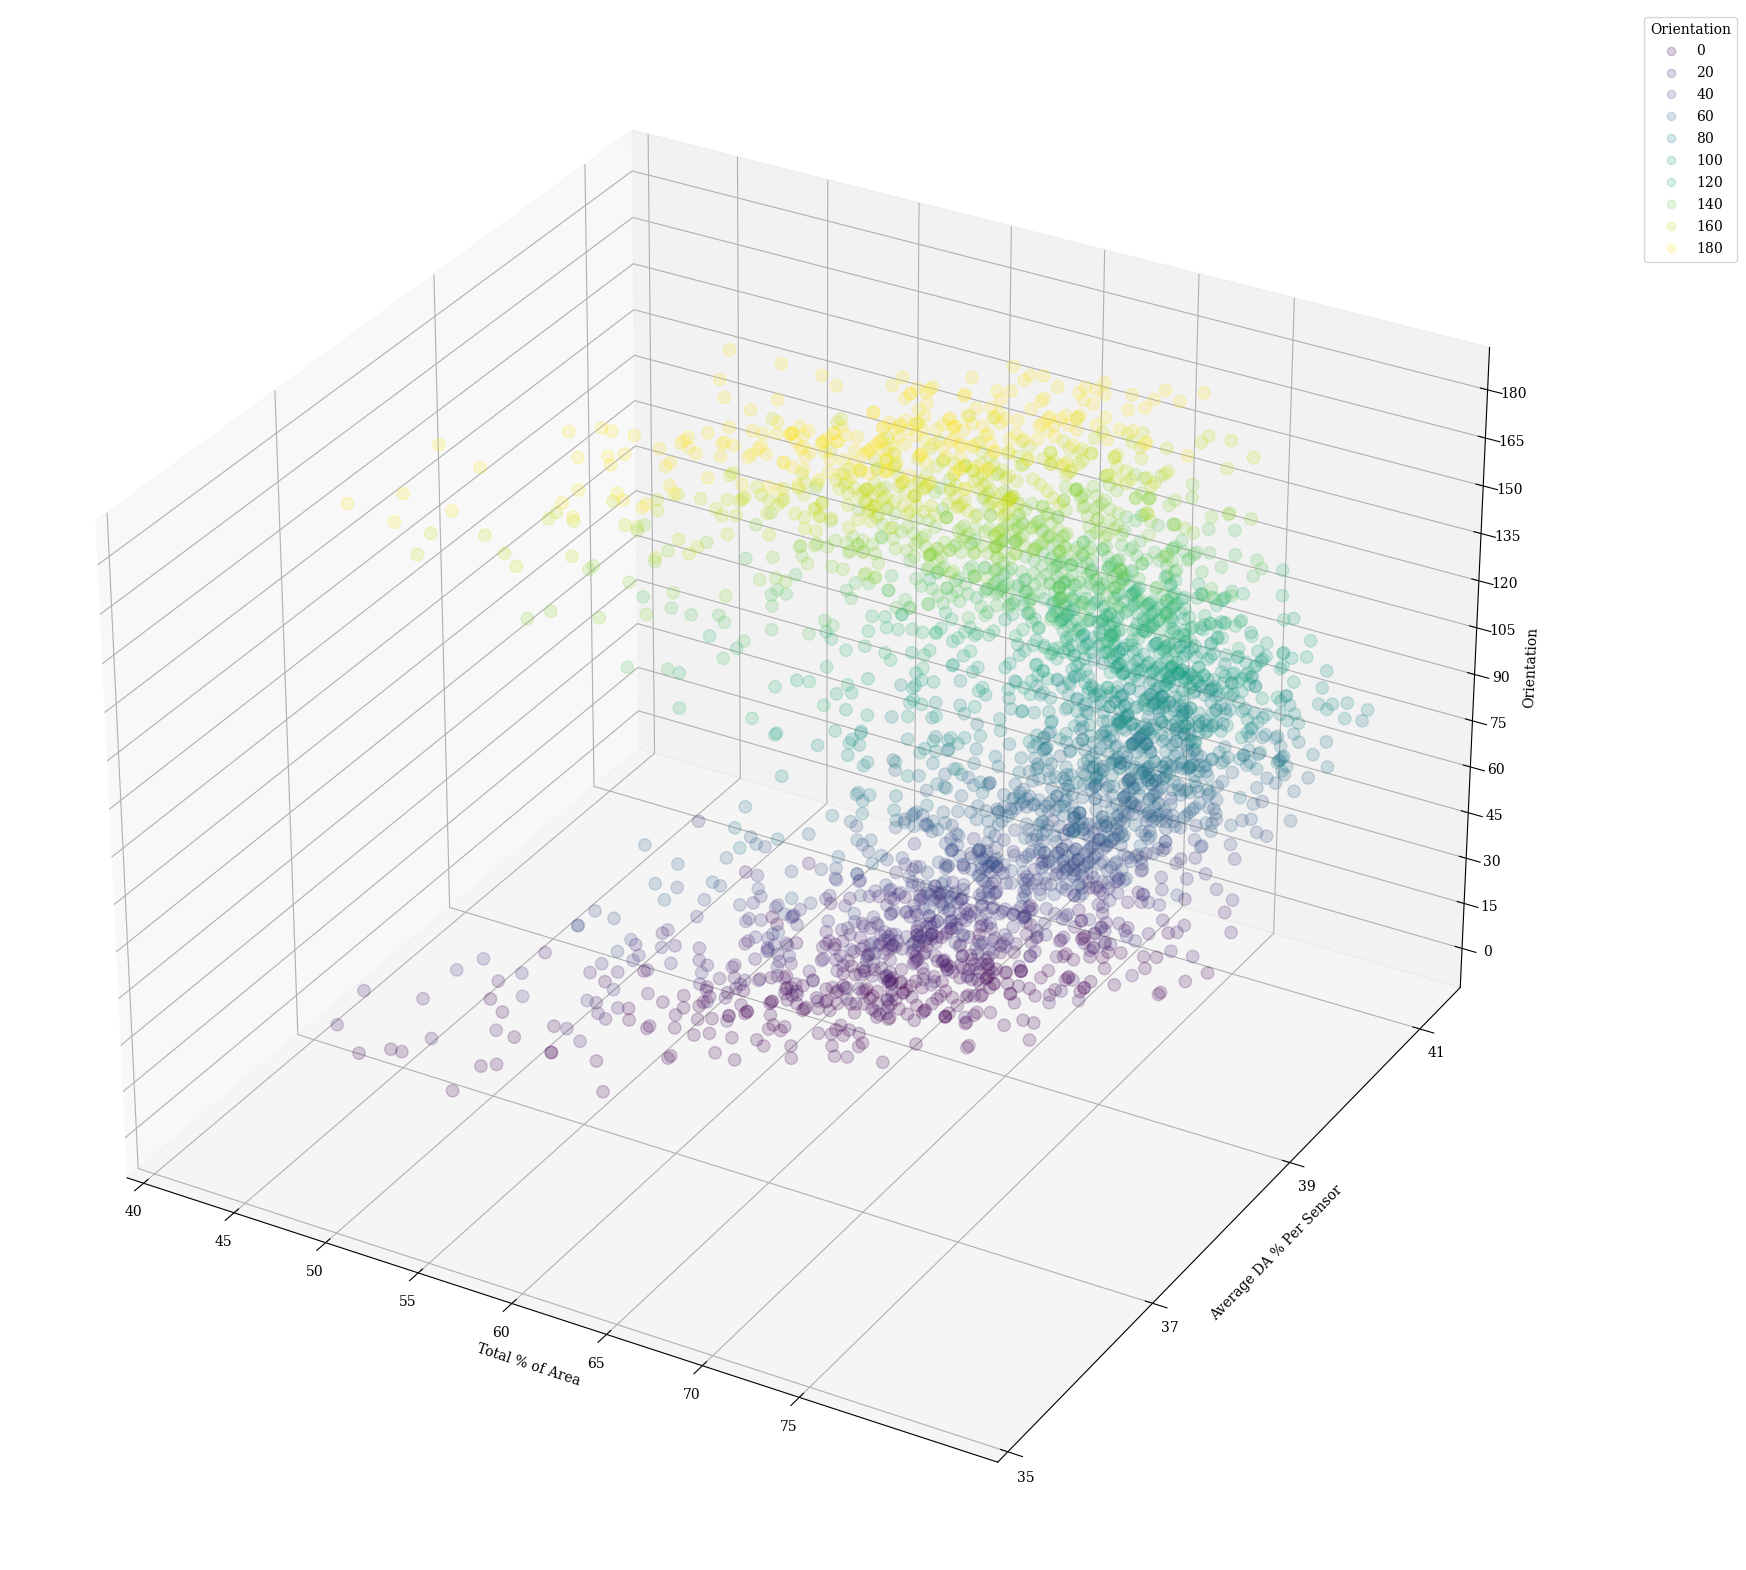

In [490]:
# ORIENTATION
# fig = plt.figure(figsize=(10,12))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,40))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, Y, z, c=z, marker='o', s=80, alpha=0.2)
ax.set_zticks(np.arange(0, 181, 15))
ax.set_xticks(np.arange(40, 80, 5))
ax.set_yticks(np.arange(35, 42, 2))
# plt.xticks(np.arange(1, 1))
ax.set_ylabel('Average DA % Per Sensor')
ax.set_xlabel('Total % of Area')
ax.set_zlabel('Orientation')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2, title='Orientation')

# c=sameindex

In [441]:
X = X.astype('float32') 
y = y.astype('float32')

# c=sameindex

In [8]:
# y_ = y.T #transpose

In [9]:
# Instantiate the dataset
dataset = CustomDataset(X,y)

In [10]:
# Define the split sizes
eval_percent = 0.10
num_eval = int(len(dataset) * eval_percent)
num_train = len(dataset) - num_eval

# Randomly split the dataset into training and evaluation datasets
train_dataset, test_dataset = random_split(dataset, [num_train, num_eval])

# print(f"Training dataset size: {len(train_dataset)}")
# print(f"Test dataset size: {len(test_dataset)}")

# Set batch size
batch_size = 50

# Create DataLoader for the training dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create DataLoader for the evaluation dataset
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

test_dataset

In [11]:
import os
import torch

def save_models(models, folder_path):
    # Create the directory if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Save each model
    for model in models:
        model_name = type(model).__name__  # Get the class name of the model
        file_path = os.path.join(folder_path, f"{model_name}.pt")
        torch.save(model.state_dict(), file_path)

    print("Models saved successfully.")

# Example usage:
# save_models([model1, model2], "/path/to/folder")

def load_models(model_objects, folder_path):
    # Load the state dicts for each model
    for model in model_objects:
        model_name = type(model).__name__  # Get the class name of the model
        file_path = os.path.join(folder_path, f"{model_name}.pt")
        model.load_state_dict(torch.load(file_path))

    print("Models loaded successfully.")

# Example usage:
# load_models([model1, model2], "/path/to/folder")



In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomConvNet(nn.Module):
    def __init__(self, num_1d_layers=3, num_2d_layers=2):# num_channels=180):
        super(CustomConvNet, self).__init__()
        
        # Define initial parameters for the 1D conv layers
        initial_channels = 16  # Initial number of channels
        self.shape_1d = 20
        self.shape_2d = (18, 10)
        
        # 1D Convolutional Layers
        self.conv1d_layers = nn.ModuleList()
        in_channels = 1
        for i in range(num_1d_layers - 1):
            out_channels = initial_channels * (2 ** i)
            self.conv1d_layers.append(nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
                nn.BatchNorm1d(out_channels),
                nn.ReLU(inplace=True),
                nn.Dropout(0.1)  # Regularization
            ))
            in_channels = out_channels
        
        # Last 1D convolution to adjust the channel size exactly to num_channels
        self.conv1d_layers.append(nn.Conv1d(in_channels, self.shape_2d[0] * self.shape_2d[1], 
                                            kernel_size=3, stride=1, padding=1))
        #print(num_channels)
        
        # 2D Convolutional Layers
        self.conv2d_layers = nn.ModuleList()
        in_channels = self.shape_1d
        for i in range(num_2d_layers):
            out_channels = 32 if i < num_2d_layers - 1 else 1  # Final output channel set to 1
            self.conv2d_layers.append(nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=(3, 3), stride=1, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True),
                nn.Dropout(0.2)  # Regularization
            ))
            in_channels = out_channels

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension (N, 1, L) where L is the sequence length

        # Apply 1D convolutions
        for layer in self.conv1d_layers:
            x = layer(x)

        # Reshape to 2D (N, C, 18, 10)
        x = x.view(x.size(0), -1, 18, 10)  # -1 here will automatically adjust to num_channels
        
        # Apply 2D convolutions
        for layer in self.conv2d_layers:
            x = layer(x)

        return x.squeeze(1)


In [13]:

def train_model(model, optimizer, train_loader, losses, epochs=1000):
    model.train()
    losses_ = losses.setdefault('train',{})
    
    for epoch in range(epochs):
        loss, metric = 0., 0.
        for iter, (inputs, targets) in enumerate(train_loader):
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = train_loss_func(outputs, targets)
            loss.backward()
            optimizer.step()

            metric = test_eval_func(outputs.detach(), targets)

            loss += loss.detach()
            metric += metric.detach()
            
        loss /= (iter + 1)
        metric /= (iter + 1)
        
        losses_.setdefault('loss', []).append(loss.detach())
        losses_.setdefault('metric', []).append(metric.detach())
        losses_.setdefault('epoch', []).append(epoch)

        if (epoch+1) % 5 == 0:
            print(f'TRAIN | Epoch {epoch+1}, Loss: {loss.item():.4f}, Metric: {metric.item():.4f}')
            test(model, epoch, losses)

def test(model, epoch, losses):
    _ = model.eval()
    losses_ = losses.setdefault('test',{})
    
    with torch.no_grad():
        loss, metric = 0., 0.
        for iter, (inputs, targets) in enumerate(test_loader):
            outputs = model(inputs)
            loss = train_loss_func(outputs.detach(), targets.detach()).detach()
            metric = test_eval_func(outputs.detach(), targets.detach()).detach()
            
        loss /= (iter + 1)
        metric /= (iter + 1)
        losses_.setdefault('loss', []).append(loss)
        losses_.setdefault('metric', []).append(metric)
        losses_.setdefault('epoch', []).append(epoch)
            
    print(f'... TEST | Epoch {epoch+1}, Loss: {loss.item():.4f}, Metric: {metric.item():.4f}')


In [14]:
class MAPELoss(torch.nn.Module):
    def __init__(self):
        super(MAPELoss, self).__init__()

    def forward(self, y_true, y_pred):
        epsilon = 1e-8
        percentage_error = torch.abs((y_true - y_pred) / (torch.abs(y_true) + epsilon))
        mape = torch.mean(percentage_error) * 100.0
        return mape

train_loss_func = nn.MSELoss()
test_eval_func = MAPELoss()

In [15]:

# Create the model
model = CustomConvNet(num_1d_layers=3, num_2d_layers=2)

if False: # test the model
    #print(model)
    # Creating a dummy input tensor of shape (N, L), where L=20
    input_tensor = torch.randn(5, 20)  # 5 examples, each 1 x 20
    # Forward pass
    output = model(input_tensor)
    print("Output shape:", output.shape)

In [16]:
# Train model

learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

losses = {}
train_model(model, optimizer, train_loader, losses,  epochs=100)

TRAIN | Epoch 5, Loss: 55.0576, Metric: 7986081280.0000
... TEST | Epoch 5, Loss: 251.6341, Metric: 31092570112.0000
TRAIN | Epoch 10, Loss: 0.4559, Metric: 0.2441
... TEST | Epoch 10, Loss: 4.3145, Metric: 1.4364
TRAIN | Epoch 15, Loss: 1.3788, Metric: 0.3932
... TEST | Epoch 15, Loss: 3.8359, Metric: 1.5065
TRAIN | Epoch 20, Loss: 0.5811, Metric: 0.3136
... TEST | Epoch 20, Loss: 3.4824, Metric: 1.3437
TRAIN | Epoch 25, Loss: 1.0599, Metric: 0.3683
... TEST | Epoch 25, Loss: 3.0628, Metric: 1.3402
TRAIN | Epoch 30, Loss: 1.0807, Metric: 0.3805
... TEST | Epoch 30, Loss: 3.1290, Metric: 1.5444
TRAIN | Epoch 35, Loss: 0.2539, Metric: 0.2035
... TEST | Epoch 35, Loss: 2.7155, Metric: 1.2613
TRAIN | Epoch 40, Loss: 0.6197, Metric: 0.2921
... TEST | Epoch 40, Loss: 2.4733, Metric: 1.2562
TRAIN | Epoch 45, Loss: 0.4842, Metric: 0.2611
... TEST | Epoch 45, Loss: 2.3777, Metric: 1.2807
TRAIN | Epoch 50, Loss: 0.4426, Metric: 0.2745
... TEST | Epoch 50, Loss: 2.6857, Metric: 1.2520
TRAIN | Ep

In [17]:
### SAVE MODEL
save_models([model], "model/")

Models saved successfully.


In [18]:
### LOAD MODEL
load_models([model], "model/")

Models loaded successfully.


<function matplotlib.pyplot.xscale(value, **kwargs)>

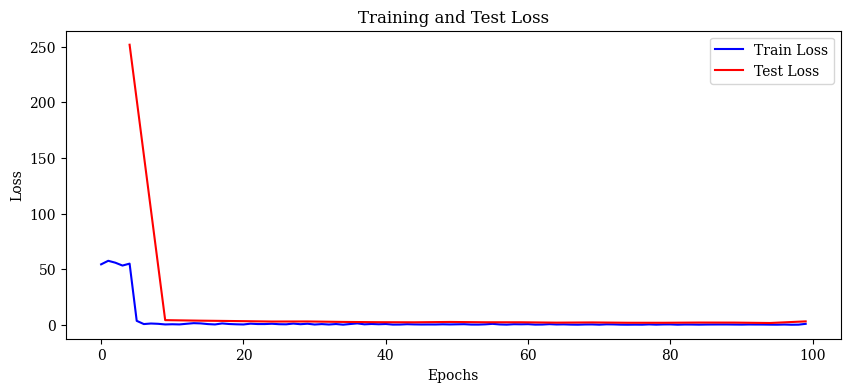

In [19]:
import matplotlib.pyplot as plt

# Plotting the loss
fig, ax = plt.subplots(figsize=(10,4))
key='loss'
ax.plot(losses['train']['epoch'], losses['train'][key], label='Train Loss', c='blue')
ax.plot(losses['test']['epoch'], losses['test'][key], label='Test Loss', c='red')

# Adding labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Training and Test Loss')

# Adding legend
ax.legend()

# Displaying the plot
plt.xscale

In [20]:
import cmap
from cmap import Color
import matplotlib.colors
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

norm=plt.Normalize(0,1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["steelblue", "gold", "red"])

norm_1=plt.Normalize(0, 2)
cmap_1= matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", "gray", "black"])

cmap_2 = colors.ListedColormap(['white', 'black', 'red'])
bounds = [0,0.9, 1.2,2.1]
norm_2 = colors.BoundaryNorm(bounds, cmap_2.N)

In [194]:
# line prep for threshold selection, RERUN EACH ITERATION

import numpy as np
import matplotlib.pyplot as plt

down=[];up=[];left=[];right=[]
for i, eachline in enumerate(intgrid):
    for j, each in enumerate(eachline):
        if each==1:
            down.append([[j,j+1],[i,i]])
            up.append([[j,j+1],[i+1,i+1]])
            left.append([[j,j],[i,i+1]])
            right.append([[j+1,j+1],[i,i+1]])

together=[]
for each in down: together.append(each)
for each in up: together.append(each)
for each in left: together.append(each)
for each in right: together.append(each)

filtered=[]
for each in together:
    c=0
    for EACH in together:
        if each==EACH:
            c+=1
    if c==1:
        filtered.append(each)

Total % of Area = 0.7555555555555555


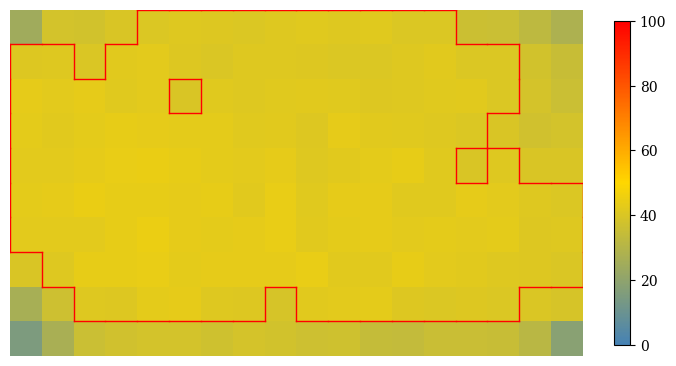

In [195]:
truth = th.tensor(dataset[566:567][1]).reshape(10,18)
pred = model(th.tensor(dataset[566:567][0])).detach().numpy().squeeze().reshape(10,18)

fig, ax = plt.subplots(figsize=(8,4.5))

threshold=40
booleangrid=np.asarray(truth)>threshold
intgrid=booleangrid*1

plt.pcolormesh(truth.reshape(10,18), cmap=cmap, vmin=0, vmax=100)
im_ratio = truth.shape[0]/truth.shape[1]
plt.colorbar(fraction=0.047*im_ratio)
plt.axis('off')
for x in range(len(filtered)):
    plt.plot(filtered[x][0],filtered[x][1],c='red', linewidth=1)

def count(booleangrid):
    return booleangrid.count(True)

print("Total % of Area =", booleangrid.sum() / 180)

tensor(18.1609)

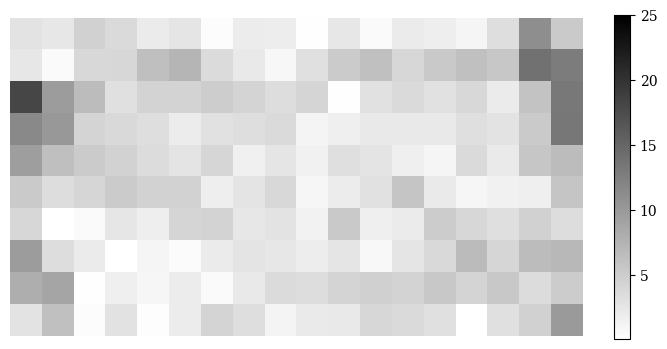

In [196]:
fig, ax = plt.subplots(figsize=(8,4.5))

plt.imshow(np.abs(truth - pred).detach(), cmap = cmap_1, vmax=25) #black is more error
plt.colorbar(fraction=0.047*im_ratio)
plt.axis('off')

th.abs(truth - pred).max()

(0.0, 18.0, 0.0, 10.0)

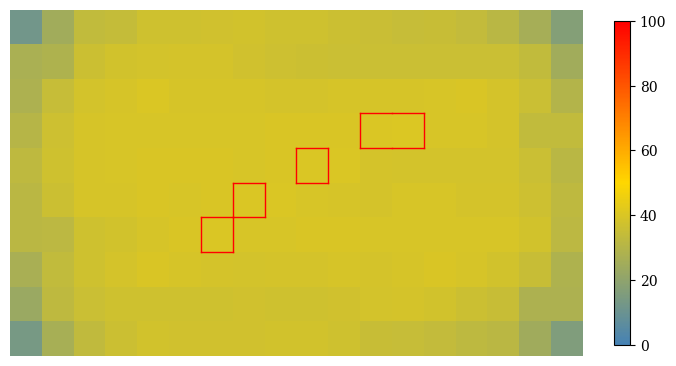

In [132]:
# AVERAGES FOR TEST_DATASET

average_truth = sum(th.tensor(test_dataset[0:299][1])) / len(test_dataset)

avgt = average_truth.reshape(10,18)

average_pred = sum(model(th.tensor(test_dataset[0:299][0]))) / len(test_dataset)

avgp = average_pred.detach().numpy().squeeze().reshape(10,18)

fig, ax = plt.subplots(figsize=(8,4.5))

threshold=40
booleangrid=np.asarray(avgp)>threshold
intgrid=booleangrid*1

plt.pcolormesh(avgp.reshape(10,18), cmap=cmap, vmin=0, vmax=100)
im_ratio = truth.shape[0]/truth.shape[1]
for x in range(len(filtered)):
    plt.plot(filtered[x][0],filtered[x][1],c='red', linewidth=1)
    
#plt.imshow(np.abs(avgt - avgp), cmap = cmap_1, vmax=25) #black is more error
plt.colorbar(fraction=0.047*im_ratio)
plt.axis('off')

In [161]:
# SORTING
da = (df['% of Total Area_0'])

sensor = (df['Average Sensor_0'])

sorted_da = np.argsort(da)

sorted_sensor = np.argsort(sensor)

top_panels_da = X[sorted_da]
top_da = da[sorted_da][::-1][:500]
top_sensor = sensor[sorted_sensor][::-1][:25]

bottom_panels_da = X[other_sorted_da]
bottom_panels_sensor = X[sorted_sensor][:25]
bottom_da = da[sorted_da][:500]
bottom_sensor = sensor[sorted_sensor][:25]

da[sorted_da][::-1][:5]

1326    0.755556
2016    0.755556
398     0.755556
1087    0.755556
566     0.755556
Name: % of Total Area_0, dtype: float64

In [28]:
mask1=(df['Average Sensor_0'] >= 40)
sensor_mask = df[mask1]

common_idx = sorted_da.index.intersection(sensor_mask.index) 
sorted_da_filtered = sorted_da.loc[common_idx]
sensor_mask_filtered = sensor_mask.loc[common_idx] 

sensor_mask_panels = X[sorted_da_filtered]

sensor_mask_panels[sensor_mask_panels == 1] = 2

sorted_da-sorted_da_filtered

smask1 = top_panels_da[11]
smask1[smask1 == 1] = 2
smask2 = top_panels_da[23]
smask2[smask2 == 1] = 2
smask3 = top_panels_da[24]
smask3[smask3 == 1] = 2

top_panels_da[11], top_panels_da[23], top_panels_da[24] = smask1, smask2, smask3

# for plot 2

common_idx1 = other_sorted_da.index.intersection(sensor_mask.index) 
sorted_da_filtered1 = other_sorted_da.loc[common_idx1]
sensor_mask_filtered1 = sensor_mask.loc[common_idx1] 

sensor_mask_panels1 = X[sorted_da_filtered1]

sensor_mask_panels1[sensor_mask_panels1 == 1] = 2

smask4 = bottom_panels_da[6]
smask4[smask4 == 1] = 2
smask5 = bottom_panels_da[11]
smask5[smask5 == 1] = 2
smask6 = bottom_panels_da[14]
smask6[smask6 == 1] = 2
smask7 = bottom_panels_da[16]
smask7[smask7 == 1] = 2

#Swapping the first and third rows
bottom_panels_da[6], bottom_panels_da[11], bottom_panels_da[14], bottom_panels_da[16] = smask4, smask5, smask6, smask7

(0.0, 20.0, 0.0, 25.0)

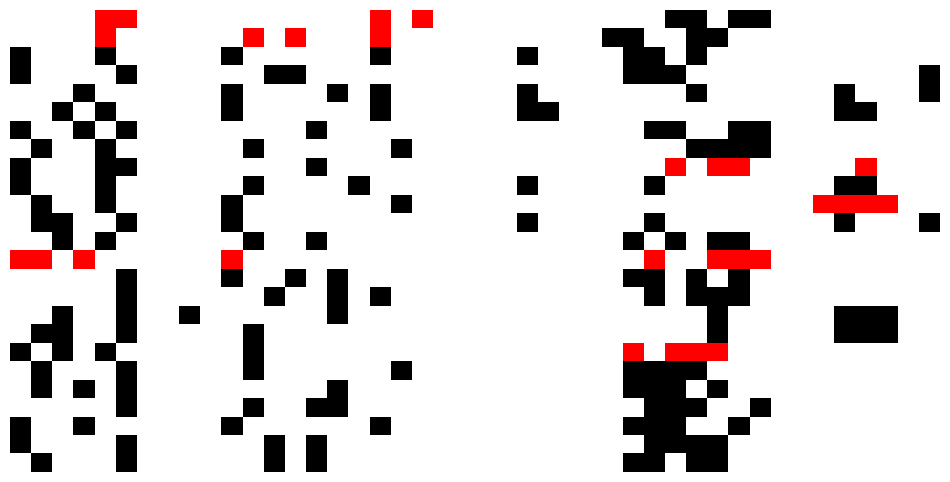

In [29]:
# Plot sorted data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot sorted data as image with flipped orientation
ax1.imshow(top_panels_da[::-1], cmap=cmap_2, norm=norm_2, aspect='auto', extent=[0, 20, 0, len(top_panels_da)])
ax1.set_ylabel('25 of the Highest DA')
ax1.set_xlabel('Panel Binary')
ax1.axis('off')

ax2.imshow(bottom_panels_da[::-1], cmap=cmap_2, norm=norm_2, aspect='auto', extent=[0, 20, 0, len(bottom_panels_da)])
ax2.set_ylabel('25 of the Lowest DA')
ax2.set_xlabel('Panel Binary')
ax2.axis('off')

In [64]:
# OBJECTIVE SCATTER PLOT (DA and Average Sensor)

top_da_sensor = sensor[top_da.index][::-1][:500]
bottom_da_sensor = sensor[bottom_da.index][:500]

top_da_sensor1 = sorted(sensor[top_da.index])[:500]
bottom_da_sensor1 = sorted(sensor[bottom_da.index])[::-1][:500]

best = np.argsort(bottom_da_sensor1)[::-1][:15]
worst = np.argsort(top_da_sensor1)[:15]

bds_y = sensor[best]
tds_y = sensor[worst]

bds_x = da[best]
tds_x = da[worst]

# display(df.iloc[2219]) # -2

top_da_sensor.shape

(500,)

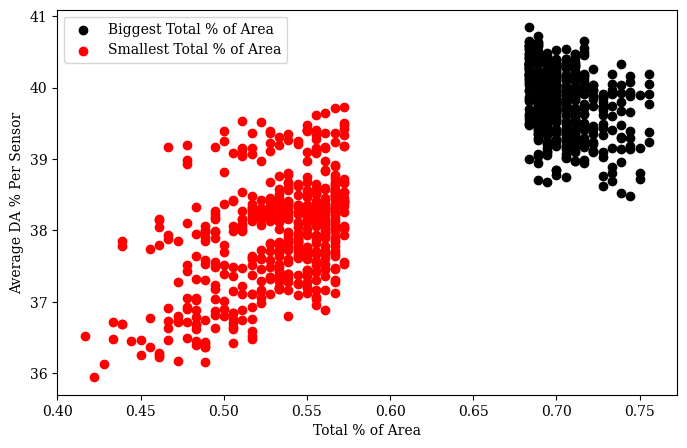

In [66]:
fig, ax = plt.subplots(figsize=(8,5))

plt.scatter(top_da, top_da_sensor, c ="black", label='Biggest Total % of Area')
plt.scatter(bottom_da, bottom_da_sensor, c ="red", label='Smallest Total % of Area')
plt.legend(loc='upper left')
ax.set_ylabel('Average DA % Per Sensor')
ax.set_xlabel('Total % of Area')
plt.show()

# plt.savefig('objective_scatterplot.png')